In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow import keras

In [5]:
import os

In [6]:
import cv2

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
from tensorflow.keras.preprocessing import image

In [9]:
import matplotlib.pyplot as plt

In [10]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [11]:
train_dataset = train.flow_from_directory("C:/Users/Administrator/Desktop/Final year Project/archive/forest_fire/Training and Validation/",target_size = (150,150),batch_size = 32,class_mode = 'binary')
test_dataset = test.flow_from_directory("C:/Users/Administrator/Desktop/Final year Project/archive/forest_fire/Testing/",target_size = (150,150),batch_size = 32,class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [12]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [13]:
model = keras.Sequential()                                                                 #adding cnn
model.add(keras.layers.Conv2D(32,(3,3),activation= 'relu' ,input_shape=(150,150,3)))       #adding first layer
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation= 'relu' ))                               #adding second layer
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation= 'relu' ))                              #adding third layer
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(256,(3,3),activation= 'relu' ))                              #adding fourth layer
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())                                                           #flattening
model.add(keras.layers.Dense(256,activation='relu'))                                       #output layer
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
r=model.fit(train_dataset,epochs=5,validation_data=test_dataset)


Epoch 1/5
58/58 [==============================] - 36s 582ms/step - loss: 0.2309 - accuracy: 0.9192 - val_loss: 0.2568 - val_accuracy: 0.9118
Epoch 2/5
58/58 [==============================] - 20s 350ms/step - loss: 0.1391 - accuracy: 0.9552 - val_loss: 0.2838 - val_accuracy: 0.8676
Epoch 3/5
58/58 [==============================] - 20s 353ms/step - loss: 0.1445 - accuracy: 0.9520 - val_loss: 0.2777 - val_accuracy: 0.9412
Epoch 4/5
58/58 [==============================] - 21s 356ms/step - loss: 0.1115 - accuracy: 0.9694 - val_loss: 0.4032 - val_accuracy: 0.8824
Epoch 5/5
58/58 [==============================] - 21s 359ms/step - loss: 0.1236 - accuracy: 0.9629 - val_loss: 0.2290 - val_accuracy: 0.8971


In [16]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

3/3 [==============================] - 0s 53ms/step


In [17]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

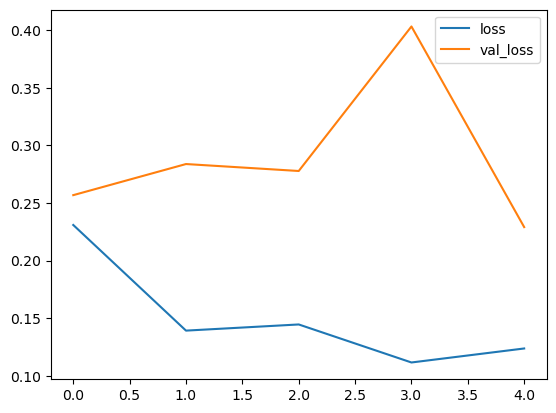

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [19]:
print(len(predictions))

68


In [20]:
def predictImage(filename):
    img1=image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y=image.img_to_array(img1)
    X=np.expand_dims(Y,axis=0)
    val=model.predict(X)
    print(val)
    if val==1:
        plt.xlabel("NO FIRE",fontsize=30)
    elif val==0:
        plt.xlabel("FIRE!",fontsize=30)

1/1 [==============================] - 0s 109ms/step
[[0.]]


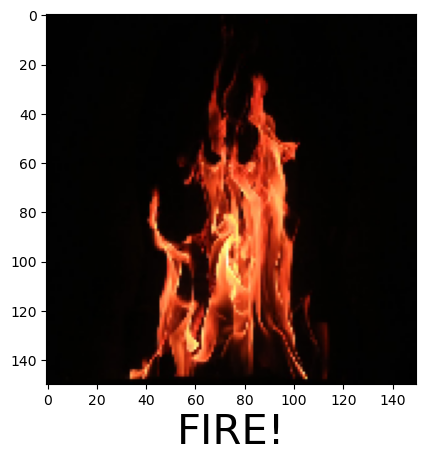

In [21]:
predictImage("C:/Users/Administrator/Desktop/Final year Project/1.jpg")

In [22]:
import pickle

In [23]:
with open('fire_detection_model','wb') as f:
    pickle.dump(model,f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...layers\max_pooling2d_3
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archiv

In [24]:
with open('fire_detection_model','rb') as f:
    newmod=pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-06 10:14:48         4604
metadata.json                                  2023-02-06 10:14:48           64
variables.h5                                   2023-02-06 10:14:48     43245824
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...layers\max_pooling2d_3
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
..

1/1 [==============================] - 0s 18ms/step
[[1.]]


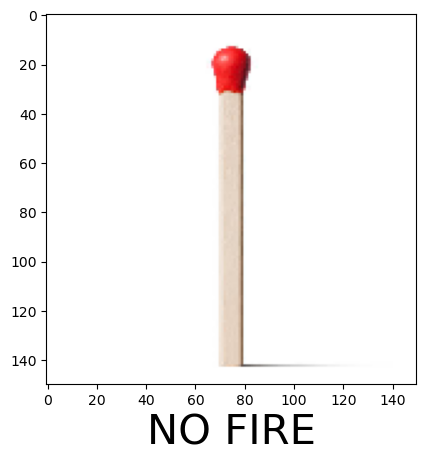

In [25]:
predictImage("C:/Users/Administrator/Desktop/Final year Project/5.jpg")